# Introduction

Le stress académique est devenu une problématique majeure dans le milieu universitaire, affectant une proportion significative d'étudiants à l'échelle mondiale. En France, une étude menée par Heyme et Opinion Way en 2020 révèle que 90% des étudiants se déclarent stressés, dont un tiers ressentant un stress permanent. Cette tendance est confirmée par l'étude CSA pour la LMDE en 2022, indiquant que 70% des étudiants se déclarent en situation de mal-être.

## Causes du stress académique

Les sources de stress chez les étudiants sont multiples et souvent
interconnectées. Parmi les facteurs les plus freéquemment cités, on retrouve :
- Pression académique : exigences élevées en termes de performance, les examens
fréquents et la charge de travail intense contribuent à un stress constant.
- Pression sociale : Les attentes des pairs, la compétition entre étudiants et le
besoin de se conformer à des normes sociales peuvent exacerber le stress.
- Pression familiale : Les attentes des parents concernant la réussite académique
et professionnelle peuvent ajouter une pression supplémentaire.
- Isolement social : Près d'un étudiant sur deux indique se sentir toujours ou
souvent seul, ce qui peut être vecteur d'anxiété ou de troubles psychiques.

## Conséquences sur la santé

Les répercussions du stress académique sur la santé des étudiants sont
préoccupantes. Il est associé à :
- Troubles mentaux : Anxiété, dépression, troubles du sommeil et épuisement
émotionnel sont couramment observés chez les étudiants stressés.
- Répercussions physiques : Le stress chronique peut entraîner des problèmes de
santé physique, tels que des troubles digestifs, des maux de tête et une baisse
du système immunitaire.
- Impact sur la réussite académique : Les étudiants en détresse psychologique
présentent un risque accru de baisse de performance académique et d'abandon des
études. Le serpent qui se mord la queue...

## Besoin d'interventions ciblées

Face à cette situation, il est essentiel de développer des stratégies de gestion
du stress adaptées aux besoins spécifiques des étudiants. Cela inclut la mise en
place de programmes de soutien psychologique, la promotion de la santé mentale et
la création d'environnements d'apprentissage favorables au bien-être en favorisant l'inclusion plutôt que l'exclusion.

Ainsi, face à l'ampleur et aux multiples facettes du stress académique, j'ai
voulu explorer ces mécanismes à travers un jeu de données concret, dans l'objectif de mieux comprendre et partager les facteurs qui contribuent au stress
chez les étudiants. Les données utilisées dans cette étude proviennent d'un
dataset disponible sur Kaggle, collecté via un questionnaire en ligne le 24
juillet 2025.

# Présentation des données

Le questionnaire portait sur plusieurs dimensions : stade académique, pression
exercée par les pairs et la famille, environnement d'étude, stratégies de coping
adoptées, habitudes de vie (comme tabac ou alcool) et l'indice de stress
académique sur lequel nous allons faire des prédictions. Chaque réponse a été
soigneusement enregistrée et compilée par le chercheur afin de permettre une
analyse exploratoire des facteurs associés au stress académique, dans le but de
produire des résultats interprétables et partageables.

Cette approche permet de mettre en lumière certaines tendances et corrélations
même si, compte tenu de la taille limitée de l'échantillon (140 observations),
les conclusions ne sont pas généralisables. Elle sert surtout à illustrer le
phénomène et à sensibiliser à l'impact du stress académique sur la santé mentale
et physique des étudiants.

### Librairies

Avant de présenter les données de notre échantillon, il est bon de montrer les différentes libraries que nous allons utiliser pour les différentes analyses qui se présenteront par la suite.

In [1]:
import numpy as np
import pandas as pd
import prince

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, average_precision_score, brier_score_loss,
precision_recall_curve, f1_score, balanced_accuracy_score, classification_report, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

Le jeu de données contient 140 réponses d'étudiants et a été structuré pour analyser les différents facteurs pouvant influencer le stress académique. Chaque variable a été soigneusement définie pour capturer un aspect précis de l'expérience étudiante :
- Timestamp : date et heure de la réponse au questionnaire.
- Your Academic Stage : niveau d'études actuel de l'étudiant.
- Peer Pressure :  pression ressentie de la part des pairs (collègues étudiants).
- Academic Pressure from your Home : pression académique perçue venant de la famille.
- Study Environment : conditions dans lesquelles l'étudiant étudie.
- What coping strategy you use as a student : stratégies de coping ou méthodes pour gérer le stress.
- Do you have any bad habits like smoking or drinking on a daily basis : habitudes de vie pouvant influencer le stress.
- What would you rate the academic competition in your student life : perception de la compétition académique.
- Rate your academic stress index : score auto-évalué du niveau de stress academique.

In [2]:
df = pd.read_csv("C:/Users/maxou/Documents/Projets/Perso/Academic_stress/academic_stress_level.csv", sep=",")
df.head(3)

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,Do you have any bad habits like smoking or drinking on a daily basis?,What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,Social support (friends or family),No,2,4


## Traitement des données

Avant toute analyse, il est important de vérifier la qualité des données :
- valeurs manquantes
- doublons
- outliers
- distribution

Ces vérifications permettront d'assurer que les analyses descriptives et le modèle prédictif reposent sur des données fiables.

In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d/%m/%Y %H:%M:%S")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                                 Non-Null Count  Dtype         
---  ------                                                                 --------------  -----         
 0   Timestamp                                                              140 non-null    datetime64[ns]
 1   Your Academic Stage                                                    140 non-null    object        
 2   Peer pressure                                                          140 non-null    int64         
 3   Academic pressure from your home                                       140 non-null    int64         
 4   Study Environment                                                      139 non-null    object        
 5   What coping strategy you use as a student?                             140 non-null    object        
 6   Do you have any bad habits like smo

Le jeu de données comme on peut le voir ci-dessus comporte 140 observations et 9 variables couvrant différents aspects du stress académique.

La variable Timestamp recodé enregistre la date et l'heure de réponse au questionnaire.

Quatre variables qualitatives de type texte que sont : le niveau académique de l'étudiant, l'environnement d'étude, la stratégie de coping utilisée et les habitudes de consommation (tabac/alcool). Ces variables passeront par la suite en numérique nécessaire pour les analyses statistiques et prédictives.

Les autres variables sont numériques, codées sous formes d'entiers de 1 à 5 à savoir : la pression des pairs, la pression familiale, la perception de la compétition académique et l'indice de stress académique (variable à prédire).

Dans l'ensemble, le dataset est relativement complet : seule la variable Study Environment présente une valeur manquante. Aucune autre variable ne comporte de données absentes, et la structure du tableau (9 colonnes et 140 lignes) est cohérente pour mener des analyses descriptives et prédictives.

In [4]:
for col in df.columns:
    print(col, df[col].unique())
df.dropna(axis=0, how="any", inplace=True)

Timestamp <DatetimeArray>
['2025-07-24 22:05:39', '2025-07-24 22:05:52', '2025-07-24 22:06:39',
 '2025-07-24 22:06:45', '2025-07-24 22:08:06', '2025-07-24 22:08:13',
 '2025-07-24 22:09:21', '2025-07-24 22:10:06', '2025-07-24 22:11:01',
 '2025-07-24 22:11:19',
 ...
 '2025-08-12 13:16:50', '2025-08-12 15:01:20', '2025-08-13 21:45:58',
 '2025-08-14 06:10:01', '2025-08-14 21:06:15', '2025-08-17 13:02:04',
 '2025-08-18 14:36:00', '2025-08-18 17:13:52', '2025-08-18 19:08:52',
 '2025-08-18 22:40:13']
Length: 140, dtype: datetime64[ns]
Your Academic Stage ['undergraduate' 'high school' 'post-graduate']
Peer pressure [4 3 1 5 2]
Academic pressure from your home [5 4 1 2 3]
Study Environment ['Noisy' 'Peaceful' 'disrupted' nan]
What coping strategy you use as a student? ['Analyze the situation and handle it with intellect'
 'Social support (friends or family)' 'Emotional breakdown (crying a lot)']
Do you have any bad habits like smoking or drinking on a daily basis? ['No' 'prefer not to say' 'Ye

In [5]:
df.describe()

,Timestamp,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,139,139.000000,139.000000,139.000000,139.000000
mean,2025-07-28 02:03:08.035971328,3.057554,3.165468,3.482014,3.719424
min,2025-07-24 22:05:39,1.000000,1.000000,1.000000,1.000000
25%,2025-07-24 22:25:22,2.000000,2.000000,3.000000,3.000000
50%,2025-07-25 08:13:01,3.000000,3.000000,4.000000,4.000000
75%,2025-07-26 09:41:36.500000,4.000000,4.000000,4.000000,4.000000
max,2025-08-18 22:40:13,5.000000,5.000000,5.000000,5.000000
std,NaN,1.075213,1.271751,1.024005,1.035800


# Statistiques descriptives

## Analyses univariées

Your Academic Stage
undergraduate    71.223022
high school      20.863309
post-graduate     7.913669
Name: proportion, dtype: float64
Study Environment
Peaceful     49.640288
disrupted    27.338129
Noisy        23.021583
Name: proportion, dtype: float64
What coping strategy you use as a student?
Analyze the situation and handle it with intellect    62.589928
Emotional breakdown (crying a lot)                    22.302158
Social support (friends or family)                    15.107914
Name: proportion, dtype: float64
Do you have any bad habits like smoking or drinking on a daily basis?
No                   87.769784
Yes                   7.194245
prefer not to say     5.035971
Name: proportion, dtype: float64


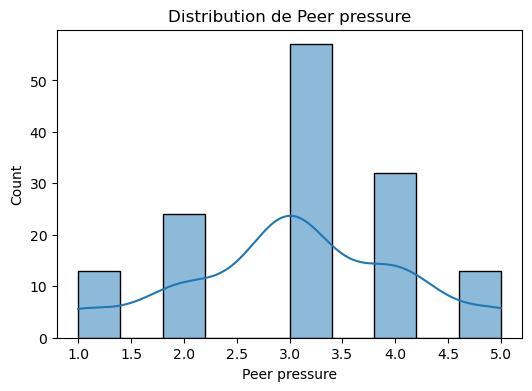

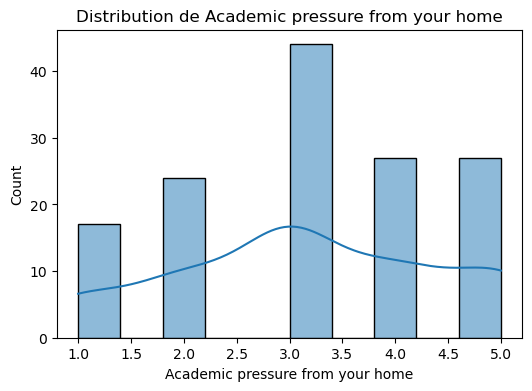

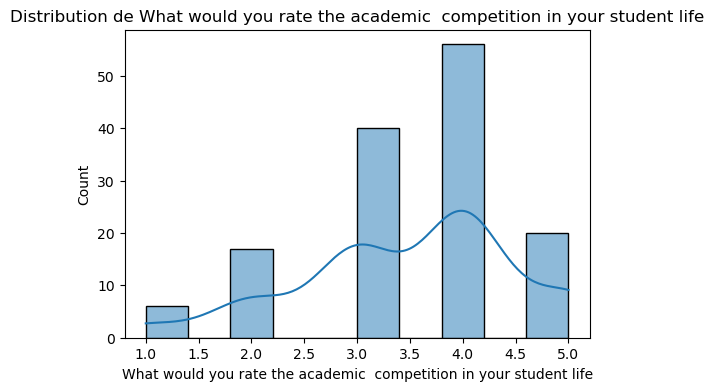

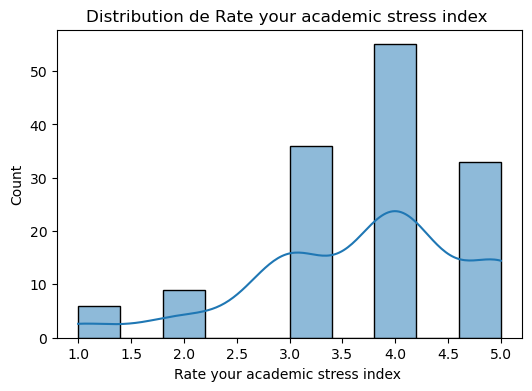

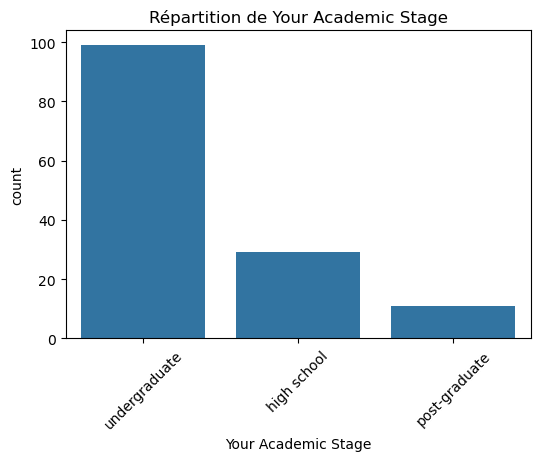

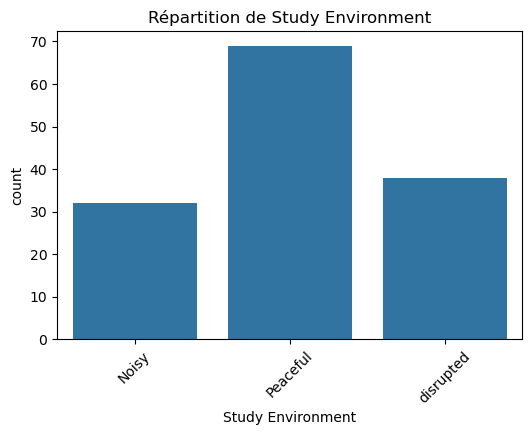

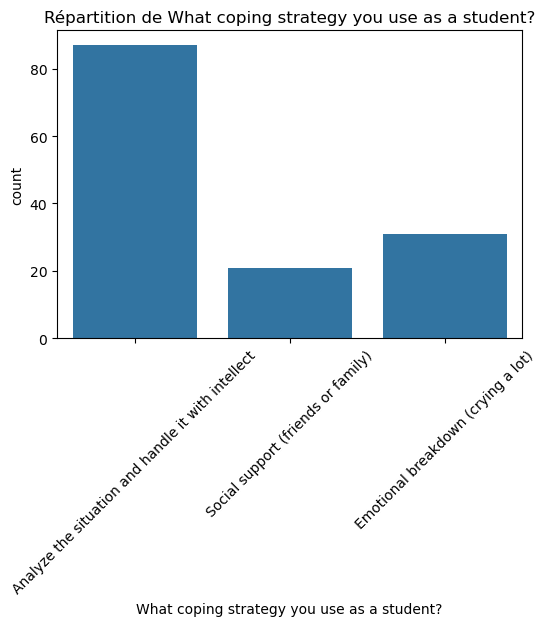

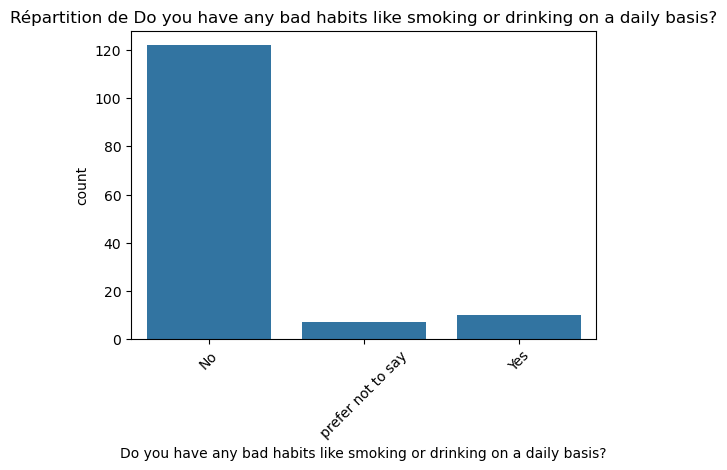

In [6]:
cat_vars = ["Your Academic Stage", "Study Environment", 
            "What coping strategy you use as a student?",
            "Do you have any bad habits like smoking or drinking on a daily basis?"]

for col in cat_vars:
    print(df[col].value_counts(normalize=True)*100)

num_vars = ["Peer pressure", 
            "Academic pressure from your home", 
            "What would you rate the academic  competition in your student life",
            "Rate your academic stress index "]

for col in num_vars:
    plt.figure(figsize = (6, 4))
    sns.histplot(df[col], kde = True, bins = 10)
    plt.title(f"Distribution de {col}")
    plt.show()

for col in cat_vars:
    plt.figure(figsize = (6, 4))
    sns.countplot(data = df, x = col)
    plt.xticks(rotation = 45)
    plt.title(f"Répartition de {col}")
    plt.show()

On distingue :
- les variables catégorielles (Academic Stage, Study Environment, Coping Strategy, Bad Habits)
- les variables quantitatives (Peer pressure, Academic pressure from home, Academic competition, Academic stress index)

Ce qui saute directement aux yeux, ce sont pour les variables quantitatives, les étudiants ont tendance à se noter plus stressé que la moyenne pour n'importe quelle variable quantitative (à en voir par rapport à la moyenne qui est toujours supérieur (>3)).

Nos individus sont en général :
- des personnes qui n'ont pas de diplôme de l'enseignement supérieur
- des personnes étudiants dans un environnement calme
- des personnes qui analyse les situations qui s'offrent à eux et interragissent de manière intelligente.
- des personnes qui ne fument pas ni ne boivent d'alcool régulièrement

Finalement les variables tels que les personnes qui fument et boivent de l'alcool régulièrement ne sont pas important dans notre échantillon et vont donc biaiser nos réponses étant donné que les catégories au sein de cette variable ne sont pas hetérogènes. Nous pouvons faire le même constat pour les variables du niveau académique ou encore les stratégies de coping adoptées par les étudiants.

Au sein de notre échantillon de données, nous avons :
- Un sentiment de stress normal en moyenne de par la pression des pairs.
- La pression à la maison par la famille se situe également autour de la moyenne.
- Le stress acumulé par rapport à la compétition entre les étudiants en revanche montre une distribution avec une grande partie des répondants qui se sentent en compétition au sein de leur établissement.
- La note que s'attribue les étudiants au niveau de leur stress en général se situe au-dessus de la moyenne avec une bonne partie des répondants indiquant un sentiment de stress très élevé.

In [7]:
df['Your Academic Stage Group'] = df['Your Academic Stage'].replace({
    "undergraduate": "Undergratuate",
    "post-graduate": "Graduate",
    "high school": "Graduate"})

Afin d’obtenir des analyses plus fiables et de meilleure qualité, il est nécessaire de regrouper certaines catégories de variables (notamment celles qui se ressemblent) afin d’assurer une meilleure homogénéité des réponses. Sans ce regroupement, le risque est de ne pas pouvoir construire un modèle prédictif est présent.

## Analyses bivariées

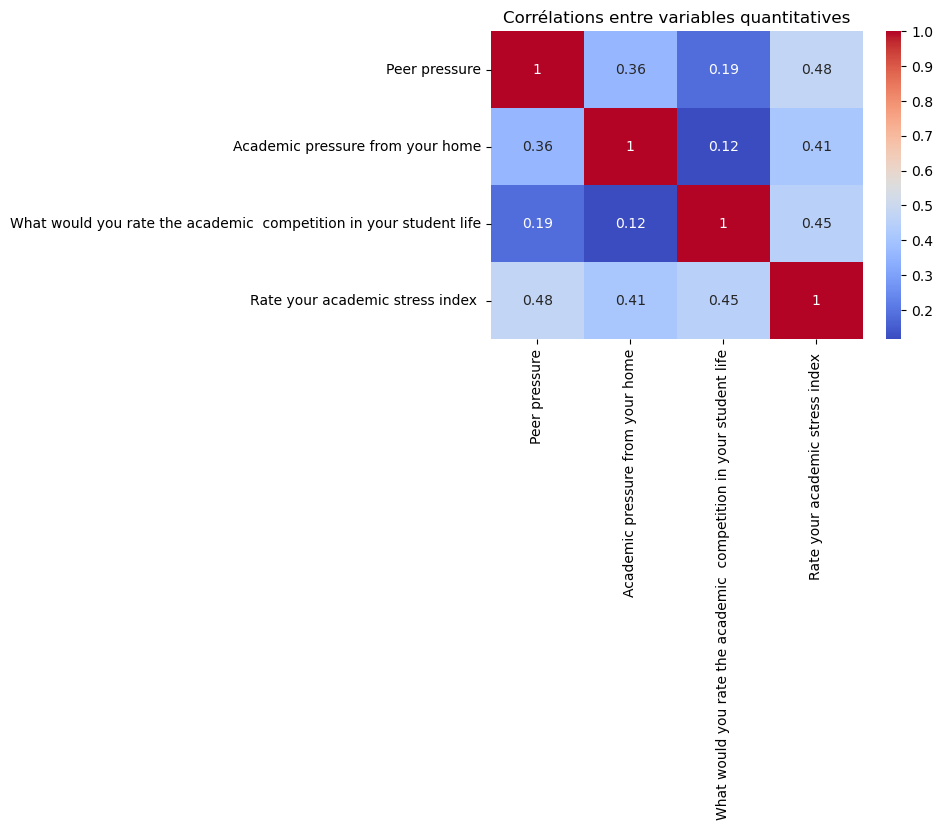

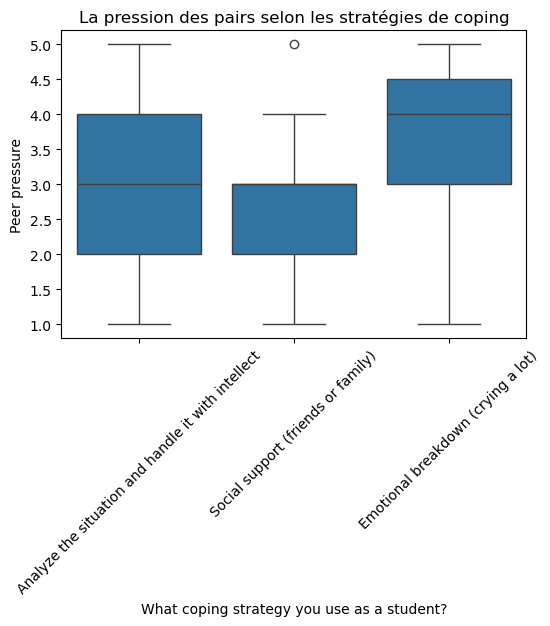

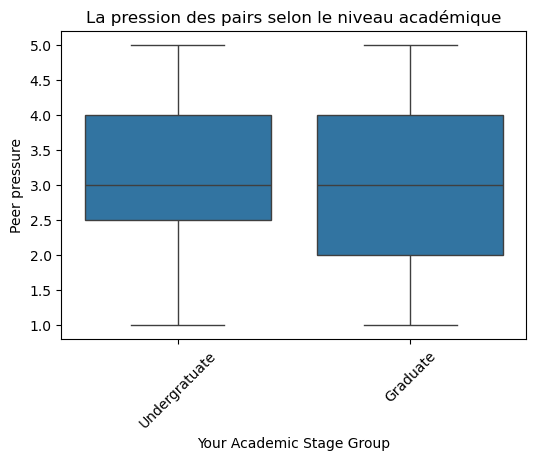

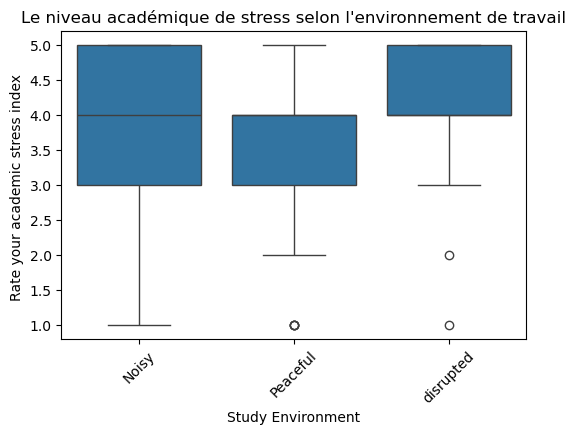

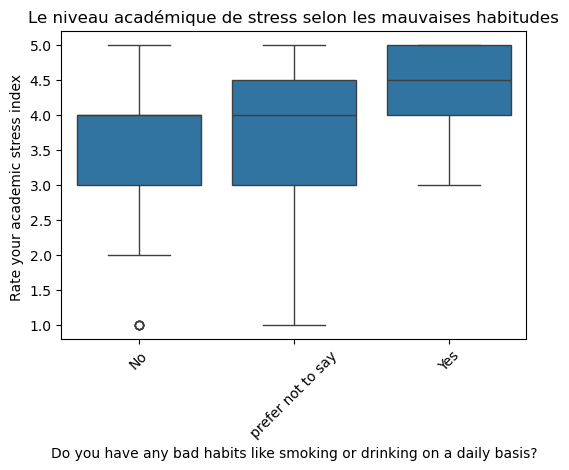

Chi2_1 = 2.0095500264577018
p-value_1 = 0.3661269992696065
V de Cramer_1 = 0.12023807398219373
Chi2_2 = 4.439639687467065
p-value_2 = 0.3497647704443085
V de Cramer_2 = 0.12637217626255695
Chi2_3 = 5.2972109857355765
p-value_3 = 0.25813812863398783
V de Cramer_3 = 0.1380388198153956
Chi2_4 = 6.6290473142947395
p-value_4 = 0.036351360164485
V de Cramer_4 = 0.21838266385549937


In [8]:
plt.figure(figsize = (6, 4))
sns.heatmap(df[num_vars].corr(), annot = True, cmap = "coolwarm")
plt.title("Corrélations entre variables quantitatives")
plt.show()

plt.figure(figsize = (6, 4))
sns.boxplot(x="What coping strategy you use as a student?", y="Peer pressure", data = df)
plt.title("La pression des pairs selon les stratégies de coping")
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (6, 4))
sns.boxplot(x="Your Academic Stage Group", y="Peer pressure", data = df)
plt.title("La pression des pairs selon le niveau académique")
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (6, 4))
sns.boxplot(x="Study Environment", y="Rate your academic stress index ", data = df)
plt.title("Le niveau académique de stress selon l'environnement de travail")
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (6, 4))
sns.boxplot(x="Do you have any bad habits like smoking or drinking on a daily basis?",y="Rate your academic stress index ", data = df)
plt.title("Le niveau académique de stress selon les mauvaises habitudes")
plt.xticks(rotation = 45)
plt.show()

contingency_table = pd.crosstab(df["Your Academic Stage Group"], df["What coping strategy you use as a student?"])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table, correction = False)
print("Chi2_1 =", chi2)
print("p-value_1 =", p)

n = contingency_table.to_numpy().sum()
minDim = min(contingency_table.shape) - 1
V = np.sqrt((chi2 / n) / minDim)
print("V de Cramer_1 =", V)

contingency_table = pd.crosstab(df["Do you have any bad habits like smoking or drinking on a daily basis?"], df["Study Environment"])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table, correction = False)
print("Chi2_2 =", chi2)
print("p-value_2 =", p)

n = contingency_table.to_numpy().sum()
minDim = min(contingency_table.shape) - 1
V = np.sqrt((chi2 / n) / minDim)
print("V de Cramer_2 =", V)

contingency_table = pd.crosstab(df["Do you have any bad habits like smoking or drinking on a daily basis?"], df["Your Academic Stage"])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table, correction = False)
print("Chi2_3 =", chi2)
print("p-value_3 =", p)

n = contingency_table.to_numpy().sum()
minDim = min(contingency_table.shape) - 1
V = np.sqrt((chi2 / n) / minDim)
print("V de Cramer_3 =", V)

contingency_table = pd.crosstab(df["Study Environment"], df["Your Academic Stage Group"])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table, correction = False)
print("Chi2_4 =", chi2)
print("p-value_4 =", p)

n = contingency_table.to_numpy().sum()
minDim = min(contingency_table.shape) - 1
V = np.sqrt((chi2 / n) / minDim)
print("V de Cramer_4 =", V)

D'après le heatmap des corrélations, on peut facilement et interpréter logiquement que le stress académique est lié à la pression des pairs (r = 0.47), à la pression familiale (r = 0.41) et la compétition académique (r = 0.45). Egalement, la pression familiale et la pression des pairs sont aussi liées (r = 0.37).
Le stress académique est multifactoriel c'est-à-dire qu'il est influencé à la fois par la pression sociale, la pression familiale et la compétition académique c'est-à-dire toutes les variables quantitatives.

Le boxplot de la pression des pairs selon les stratégies de coping montre que ceux qui ont des effondrement émotionnel sont ceux qui subissent la pression des pairs la plus élevée (médiane ≈ 4,5). Le soutien social des proches ont la pression la plus faible (médiane ≈ 3) avec un outlier à 5.
En conclusion les stratégies de coping influencent la perception de la pression sociale, en effet, chercher du soutien réduit la pression, alors que s'effondrer l'amplifie.

Le boxplot de la pression des pairs selon le niveau académique informe que les lycéens et étudiants en licence ont une pression des pairs plus variables et parfois élevée contrairement aux post-gradués qui rapportent une pression beaucoup moins variable et stable.
Ainsi, la pression des pairs est plus forte avant les études supérieures avancées, ce qui reflète sans doute la compétition et la recherche d'intégration sociale.

Le boxplot du stress académique et l'environnement de travail indique ici que les environnements perturbés et bruyants sont associés à un stress élevé (médiane ≈ 4,5) tandis que les environnements paisibles sont liés à un stress plus faible.

Le dernier boxplot du stress académique et des mauvaises habitudes affiche que les étudiants avec de mauvaises habitudes ont un stress plus élevé par rapport à ceux sans mauvaises habitudes. Ainsi, les mauvaises habitudes semblent être associées à un stress académique plus intense.

Les tests du Chi2 dans l'ensemble ne permettent pas de rejeter l'hypothèse nulle d'indépendance entre les variables étudiées, sauf pour le cas de l'environnement d'étude et du niveau académique (p ≈ 0.036), où une tendance intéressante se dessine sans toutefois atteindre la significativté statistique au seuil de 1% mais qui atteint tout de même la significativté au seuil de 5% habituellement utilisé.

## Analyses multivariées

AUC train: 0.792
AUC test : 0.747
PR-AUC test: 0.857
Brier test : 0.203

=== OR (par cran pour ordinales, vs réf pour dummies) ===
                                             feature        OR
0  What would you rate the academic  competition ...  2.082618
1                                  Peer pressure_grp  1.626368
2               Academic pressure from your home_grp  1.365753
3                        Study Environment_disrupted  1.360029
4  What coping strategy you use as a student?_Soc...  1.359230
5            Your Academic Stage Group_Undergratuate  0.974378
6  What coping strategy you use as a student?_Emo...  0.791911
7                         Study Environment_Peaceful  0.505121

--- Seuil F1 = 0.337234 ---
[[ 5 13]
 [ 2 29]]
              precision    recall  f1-score   support

           0      0.714     0.278     0.400        18
           1      0.690     0.935     0.795        31

    accuracy                          0.694        49
   macro avg      0.702     0.607   

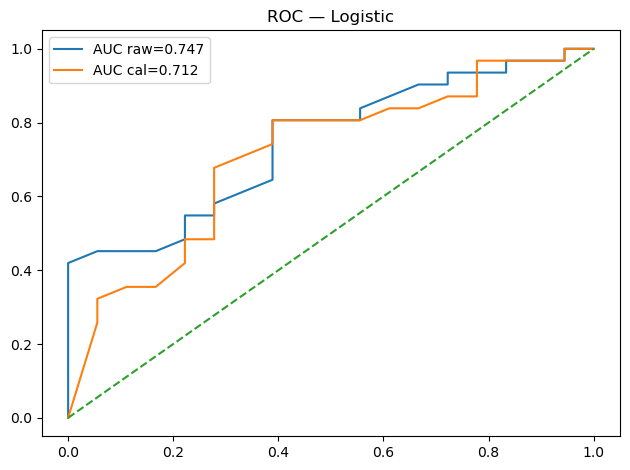

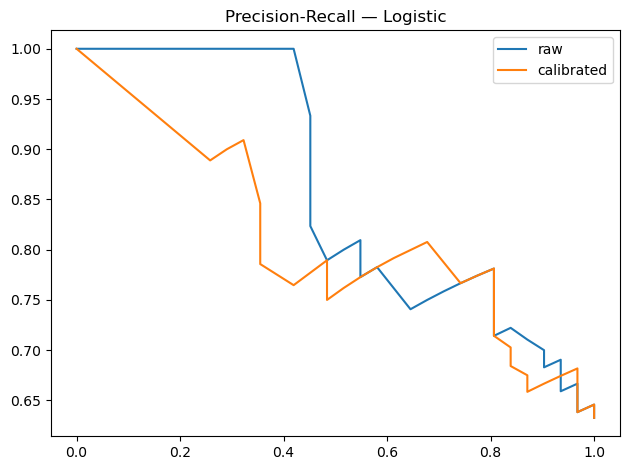

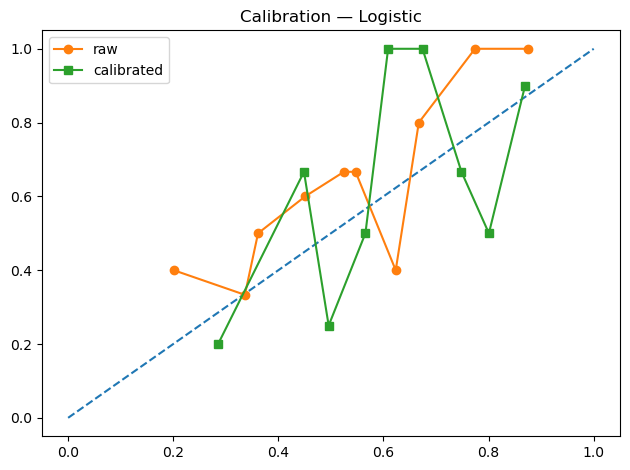


CV (5-fold) — AUC: 0.699 ± 0.054 | PR-AUC: 0.801 ± 0.021


In [19]:
df["HighStress"] = (df["Rate your academic stress index "] >= 4).astype(int)

ordinal_cols = [
    "Peer pressure",
    "Academic pressure from your home",
    "What would you rate the academic  competition in your student life",  # attention au double espace
]
nominal_cols = [
    "Study Environment",
    "What coping strategy you use as a student?",
    "Your Academic Stage Group",
]

for c in ordinal_cols + nominal_cols:
    df[c] = df[c].apply(lambda v: np.nan if pd.isna(v) else str(v))

map_bins = {"1":"1-2", "2":"1-2", "3":"3", "4":"4-5", "5":"4-5"}
ordered_levels = ["1-2", "3", "4-5"]
for c in ordinal_cols:
    s = df[c].map(map_bins)
    df[c + "_grp"] = pd.Categorical(s, categories=ordered_levels, ordered=True)

ordinal_grp_cols = [c + "_grp" for c in ordinal_cols]

X = pd.concat([df[ordinal_grp_cols], df[nominal_cols]], axis=1)
y = df["HighStress"].astype(int).values

Xtr_raw, Xte_raw, ytr, yte = train_test_split(
    X, y, test_size=0.35, random_state=42, stratify=y)

ord_enc = OrdinalEncoder(
    categories=[ordered_levels for _ in ordinal_grp_cols],
    dtype=float,
    handle_unknown="use_encoded_value",
    unknown_value=np.nan)

try:
    ohe = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(drop="first", handle_unknown="ignore", sparse=False)

preprocess = ColumnTransformer(
    transformers=[
        ("ord", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("enc", ord_enc),
        ]), ordinal_grp_cols),
        ("nom", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", ohe),
        ]), nominal_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

Xtr_mat = preprocess.fit_transform(Xtr_raw)
Xte_mat = preprocess.transform(Xte_raw)

ord_names = ordinal_grp_cols[:]
nom_names = preprocess.named_transformers_["nom"].named_steps["ohe"].get_feature_names_out(nominal_cols).tolist()
feature_names = ord_names + nom_names

log_clf = LogisticRegression(
    solver="liblinear", penalty="l2", C=1.0, class_weight="balanced", max_iter=5000
)
log_clf.fit(Xtr_mat, ytr)

proba_tr = log_clf.predict_proba(Xtr_mat)[:, 1]
proba_te = log_clf.predict_proba(Xte_mat)[:, 1]

print("AUC train:", round(roc_auc_score(ytr, proba_tr), 3))
print("AUC test :", round(roc_auc_score(yte, proba_te), 3))
print("PR-AUC test:", round(average_precision_score(yte, proba_te), 3))
print("Brier test :", round(brier_score_loss(yte, proba_te), 3))

coef = log_clf.coef_.ravel()
OR = np.exp(coef)
or_table = pd.DataFrame({"feature": feature_names, "OR": OR}) \
            .sort_values("OR", ascending=False).reset_index(drop=True)
print("\n=== OR (par cran pour ordinales, vs réf pour dummies) ===")
print(or_table.head(25))

prec, rec, thr = precision_recall_curve(yte, proba_te)
f1s = [f1_score(yte, (proba_te >= t).astype(int)) for t in thr]
best_t_f1 = thr[int(np.argmax(f1s))]

target_sens = 0.80
candidates = [(t, r, p) for t, r, p in zip(thr, rec[1:], prec[1:]) if r >= target_sens]
best_t_sens = min(candidates, key=lambda x: x[0])[0] if candidates else 0.5

for label, t in [("F1", best_t_f1), (f"Sensitivity≥{target_sens:.2f}", best_t_sens), ("0.5", 0.5)]:
    y_hat = (proba_te >= t).astype(int)
    print(f"\n--- Seuil {label} = {t:.6f} ---")
    print(confusion_matrix(yte, y_hat))
    print(classification_report(yte, y_hat, digits=3, zero_division=0))

rng = np.random.default_rng(42)
B = 500
n = Xtr_mat.shape[0]
boot_OR = np.zeros((B, len(coef)))
for b in range(B):
    idx = rng.integers(0, n, n)
    Xb = Xtr_mat[idx]
    yb = ytr[idx]
    try:
        m = LogisticRegression(solver="liblinear", penalty="l2", C=1.0, class_weight="balanced", max_iter=5000)
        m.fit(Xb, yb)
        boot_OR[b, :] = np.exp(m.coef_.ravel())
    except Exception:
        boot_OR[b, :] = np.nan

OR_low = np.nanpercentile(boot_OR, 2.5, axis=0)
OR_high = np.nanpercentile(boot_OR, 97.5, axis=0)
or_table_ci = pd.DataFrame({
    "feature": feature_names,
    "OR": OR,
    "IC95%_low": OR_low,
    "IC95%_high": OR_high
}).sort_values("OR", ascending=False).reset_index(drop=True)
print("\n=== OR + IC95% (bootstrap) ===")
print(or_table_ci.head(25))

cal_iso = CalibratedClassifierCV(estimator=LogisticRegression(
    solver="liblinear", penalty="l2", C=1.0, class_weight="balanced", max_iter=5000
), method="isotonic", cv=5)
cal_iso.fit(Xtr_mat, ytr)
proba_cal = cal_iso.predict_proba(Xte_mat)[:, 1]

print("\nAUC cal :", round(roc_auc_score(yte, proba_cal), 3))
print("PR-AUC cal :", round(average_precision_score(yte, proba_cal), 3))
print("Brier cal :", round(brier_score_loss(yte, proba_cal), 3))

fpr_raw, tpr_raw, _ = roc_curve(yte, proba_te)
fpr_cal, tpr_cal, _ = roc_curve(yte, proba_cal)
plt.figure(); plt.plot(fpr_raw, tpr_raw, label=f"AUC raw={roc_auc_score(yte, proba_te):.3f}")
plt.plot(fpr_cal, tpr_cal, label=f"AUC cal={roc_auc_score(yte, proba_cal):.3f}")
plt.plot([0,1],[0,1],'--'); plt.legend(); plt.title("ROC — Logistic"); plt.tight_layout(); plt.show()

prec_raw, rec_raw, _ = precision_recall_curve(yte, proba_te)
prec_cal, rec_cal, _ = precision_recall_curve(yte, proba_cal)
plt.figure(); plt.plot(rec_raw, prec_raw, label="raw")
plt.plot(rec_cal, prec_cal, label="calibrated")
plt.title("Precision-Recall — Logistic"); plt.legend(); plt.tight_layout(); plt.show()

pt, pp = calibration_curve(yte, proba_te, n_bins=10, strategy="quantile")
ptc, ppc = calibration_curve(yte, proba_cal, n_bins=10, strategy="quantile")
plt.figure(); plt.plot([0,1],[0,1],'--')
plt.plot(pp, pt, marker='o', label="raw")
plt.plot(ppc, ptc, marker='s', label="calibrated")
plt.title("Calibration — Logistic"); plt.legend(); plt.tight_layout(); plt.show()

pipe_log = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(solver="liblinear", penalty="l2", C=1.0, class_weight="balanced", max_iter=5000))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_cv = cross_val_score(pipe_log, pd.concat([df[ordinal_grp_cols], df[nominal_cols]], axis=1), y, cv=cv, scoring="roc_auc")
prauc_cv = cross_val_score(pipe_log, pd.concat([df[ordinal_grp_cols], df[nominal_cols]], axis=1), y, cv=cv, scoring="average_precision")
print("\nCV (5-fold) — AUC:", round(auc_cv.mean(),3), "±", round(auc_cv.std(),3),
      "| PR-AUC:", round(prauc_cv.mean(),3), "±", round(prauc_cv.std(),3))

Le modèle de régression logistique offre une performance globalement convaincante, avec une AUC test de 0,747 et une PR-AUC de 0,857, en ligne avec la validation croisée (AUC 0,699 ± 0,054 ; PR-AUC 0,801 ± 0,021). Les probabilités prédites restent utilisables (Brier 0,203) et la calibration isotone n’apporte qu’un gain marginal, signe d’un ajustement déjà correct au regard de la taille de l’échantillon.

Au seuil optimisant le F1 (≈ 0,34), le modèle privilégie délibérément la détection des étudiants à haut stress (rappel 0,935) au prix d’un sur-dépistage ; un parti pris pertinent pour un usage de screening. À l’inverse, un seuil très bas (≈ 0,11) atteint une sensibilité parfaite mais perd tout pouvoir de tri, et devrait être réservé à des contextes où l’on ne peut se permettre aucun faux négatif. Le seuil 0,50 propose un compromis plus équilibré (rappel 0,677, spécificité 0,611), adapté à des décisions où le coût des erreurs de part et d’autre est comparable.

Sur le plan interprétatif, la compétition académique perçue émerge comme un facteur clairement associé au haut stress (OR = 2,08 ; IC95 % [1,19;3,89]). D’autres effets vont dans le sens attendu — pression des pairs et pression familiale plutôt majorantes, environnement paisible (OR ≈ 0,51) et stratégies d’adaptation émotionnelles (OR ≈ 0,79) plutôt protecteurs — mais leurs intervalles de confiance englobent 1 et appellent donc à la prudence.

En pratique, on recommandera : 
- 1 : un seuil 0,34 pour prioriser un accompagnement proactif des profils à risque.
- 2 : un seuil 0,50 pour des décisions plus équilibrées.
- 3 : le renforcement d’actions ciblant la pression compétitive (cadre d’évaluation, attentes) et la qualité de l’environnement d’étude, tout en promouvant des stratégies émotionnelles de coping. 
Enfin, l’acquisition de données supplémentaires et l’exploration de modèles complémentaires (interactions, approches non linéaires) devraient accroître la robustesse et la finesse des conclusions.

In [23]:
prec, rec, thr = precision_recall_curve(yte, proba_te)

spec_list, sens_list, f1_list, thr_list = [], [], [], []
for t in thr:
    y_hat = (proba_te >= t).astype(int)
    TN, FP, FN, TP = confusion_matrix(yte, y_hat).ravel()
    sens = TP / (TP + FN) if (TP+FN)>0 else 0.0    
    spec = TN / (TN + FP) if (TN+FP)>0 else 0.0      
    prec_t = TP / (TP + FP) if (TP+FP)>0 else 0.0
    f1 = 2*prec_t*sens / (prec_t+sens) if (prec_t+sens)>0 else 0.0
    sens_list.append(sens); spec_list.append(spec); f1_list.append(f1); thr_list.append(t)

min_sens, min_spec = 0.80, 0.30
idx = [i for i,(se,sp) in enumerate(zip(sens_list, spec_list)) if (se >= min_sens and sp >= min_spec)]
if len(idx)==0:
    min_sens, min_spec = 0.80, 0.20
    idx = [i for i,(se,sp) in enumerate(zip(sens_list, spec_list)) if (se >= min_sens and sp >= min_spec)]

best_i = max(idx, key=lambda i: f1_list[i]) if len(idx)>0 else int(np.argmax(f1_list))
best_t = thr_list[best_i]

print(f"Seuil choisi (contrainte sens≥{min_sens:.2f}, spec≥{min_spec:.2f}): {best_t:.6f}")
y_hat = (proba_te >= best_t).astype(int)
print(confusion_matrix(yte, y_hat))
print(classification_report(yte, y_hat, digits=3, zero_division=0))

w_FN, w_FP = 3.0, 1.0

best_cost, best_t_cost = np.inf, 0.5
for t in thr:
    y_hat = (proba_te >= t).astype(int)
    TN, FP, FN, TP = confusion_matrix(yte, y_hat).ravel()
    cost = w_FN*FN + w_FP*FP
    if cost < best_cost:
        best_cost, best_t_cost = cost, t

print(f"Seuil coût-minimisant (wFN={w_FN}, wFP={w_FP}): {best_t_cost:.6f} | coût={best_cost}")
y_hat = (proba_te >= best_t_cost).astype(int)
print(confusion_matrix(yte, y_hat))
print(classification_report(yte, y_hat, digits=3, zero_division=0))

report = {
    "AUC_test_raw": round(roc_auc_score(yte, proba_te), 3),
    "PR_AUC_test_raw": round(average_precision_score(yte, proba_te), 3),
    "Brier_test_raw": round(brier_score_loss(yte, proba_te), 3),
    "Seuil_F1": float(best_t_f1),
    "Seuil_contrainte": float(best_t),
}
pd.Series(report)

try:
    ohe2 = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe2 = OneHotEncoder(drop="first", handle_unknown="ignore", sparse=False)

preprocess_dummies = ColumnTransformer(
    transformers=[
        ("ord_as_nom", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", ohe2),
        ]), ordinal_grp_cols),
        ("nom", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", ohe2),
        ]), nominal_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

Xtr_dm = preprocess_dummies.fit_transform(Xtr_raw)
Xte_dm = preprocess_dummies.transform(Xte_raw)
feat_dm = preprocess_dummies.named_transformers_["ord_as_nom"].named_steps["ohe"] \
           .get_feature_names_out(ordinal_grp_cols).tolist() + \
          preprocess_dummies.named_transformers_["nom"].named_steps["ohe"] \
           .get_feature_names_out(nominal_cols).tolist()

log2 = LogisticRegression(solver="liblinear", penalty="l2", C=1.0, class_weight="balanced", max_iter=5000)
log2.fit(Xtr_dm, ytr)
OR_dm = np.exp(log2.coef_.ravel())
or_dm_table = pd.DataFrame({"feature": feat_dm, "OR": OR_dm}).query("feature.str.contains('_grp_')", engine='python')
print(or_dm_table.sort_values("OR", ascending=False))

Seuil choisi (contrainte sens≥0.80, spec≥0.30): 0.464771
[[11  7]
 [ 6 25]]
              precision    recall  f1-score   support

           0      0.647     0.611     0.629        18
           1      0.781     0.806     0.794        31

    accuracy                          0.735        49
   macro avg      0.714     0.709     0.711        49
weighted avg      0.732     0.735     0.733        49

Seuil coût-minimisant (wFN=3.0, wFP=1.0): 0.140474 | coût=17.0
[[ 1 17]
 [ 0 31]]
              precision    recall  f1-score   support

           0      1.000     0.056     0.105        18
           1      0.646     1.000     0.785        31

    accuracy                          0.653        49
   macro avg      0.823     0.528     0.445        49
weighted avg      0.776     0.653     0.535        49

                                             feature        OR
5  What would you rate the academic  competition ...  3.038920
1                              Peer pressure_grp_4-5  2.227534

In [12]:
t_op = 0.464771
y_hat_op = (proba_te >= t_op).astype(int)

print("Seuil opérationnel:", t_op)
print(confusion_matrix(yte, y_hat_op))
print(classification_report(yte, y_hat_op, digits=3, zero_division=0))

out_test = pd.DataFrame({
    "index": Xte_raw.index,
    "proba": proba_te,
    "pred@t_op": y_hat_op,
    "y_true": yte
}).set_index("index")
out_test.to_csv("predictions_test_logit.csv")

X_all = pd.concat([df[ordinal_grp_cols], df[nominal_cols]], axis=1)
X_all_mat = preprocess.transform(X_all)
proba_all = log_clf.predict_proba(X_all_mat)[:, 1]
pred_all = (proba_all >= t_op).astype(int)

full_scores = pd.DataFrame({
    "index": df.index,
    "HighStress_true": df["HighStress"].values,
    "proba": proba_all,
    "pred@t_op": pred_all
}).set_index("index")
full_scores.to_csv("scores_full_logit.csv")

Seuil opérationnel: 0.464771
[[11  7]
 [ 6 25]]
              precision    recall  f1-score   support

           0      0.647     0.611     0.629        18
           1      0.781     0.806     0.794        31

    accuracy                          0.735        49
   macro avg      0.714     0.709     0.711        49
weighted avg      0.732     0.735     0.733        49

Exporté : predictions_test_logit.csv
Exporté : scores_full_logit.csv


Avec un seuil opérationnel fixé à 0,465, le modèle atteint un équilibre performant entre détection des cas à haut stress et maîtrise des faux positifs. L’accuracy progresse à 0,735, tandis que la sensibilité sur la classe « haut stress » culmine à 0,806, gage d’une bonne capacité de repérage des profils prioritaires. En parallèle, la précision sur cette classe reste élevée (0,781) et la spécificité côté non-cas se maintient à 0,611, préservant un niveau raisonnable de faux positifs.

Sur le plan de la qualité globale, les scores F1 pondéré (0,733) et macro-F1 (0,711) confirment la stabilité du compromis obtenu : le modèle discrimine utilement sans sacrifier de manière excessive l’un des deux types d’erreurs. En pratique, ce seuil constitue une option de déploiement crédible pour prioriser l’accompagnement, notamment dans une logique de dépistage proactif.

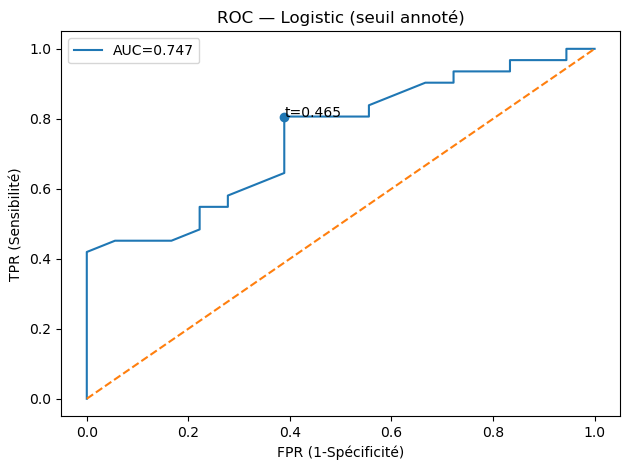

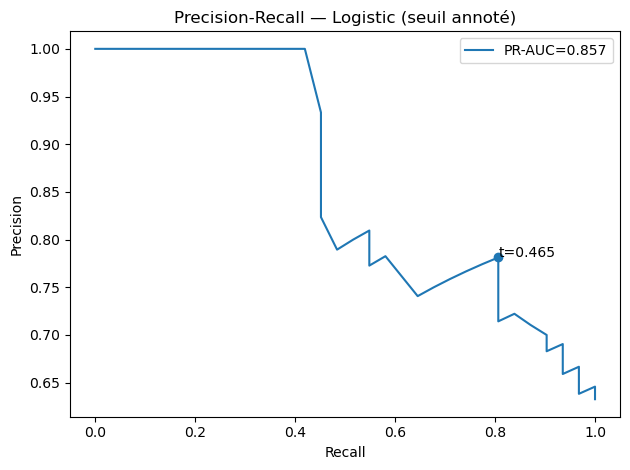

In [21]:
fpr, tpr, thr_roc = roc_curve(yte, proba_te)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(yte, proba_te):.3f}")

i_op = np.argmin(np.abs(thr_roc - t_op))
plt.scatter(fpr[i_op], tpr[i_op])
plt.annotate(f"t={t_op:.3f}", (fpr[i_op], tpr[i_op]))
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR (1-Spécificité)"); plt.ylabel("TPR (Sensibilité)")
plt.title("ROC — Logistic (seuil annoté)")
plt.legend(); plt.tight_layout(); plt.show()

prec, rec, thr_pr = precision_recall_curve(yte, proba_te)
plt.figure()
plt.plot(rec, prec, label=f"PR-AUC={average_precision_score(yte, proba_te):.3f}")

i2 = np.argmin(np.abs(thr_pr - t_op))
plt.scatter(rec[i2], prec[i2])
plt.annotate(f"t={t_op:.3f}", (rec[i2], prec[i2]))
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall — Logistic (seuil annoté)")
plt.legend(); plt.tight_layout(); plt.show()

La ROC s’écarte nettement de la diagonale du hasard, indiquant une capacité discriminante modérée à bonne. Au seuil opérationnel (t = 0,465), on obtient une sensibilité ≈ 0,81 pour une FPR ≈ 0,39 (spécificité ≈ 0,61), positionnant l’algorithme dans une zone d’arbitrage réaliste quand le coût de rater un cas est supérieur à celui d’un faux positif.

La courbe PR traduit une qualité de tri élevée des cas à haut stress. Le point opérationnel annoté (t = 0,465) se situe dans la zone supérieure de la courbe, avec un rappel ≈ 0,80 et une précision ≈ 0,78, soit un compromis pertinent pour un dépistage proactif : on identifie la grande majorité des étudiants à risque tout en conservant un bon taux de pertinence parmi les positifs signalés.

Les deux courbes convergent : le seuil retenu maximise l’utilité pratique en contexte de dépistage (rappel élevé, précision soutenue), sans dérive excessive du taux de faux positifs. Compte tenu de la taille de l’échantillon, ces résultats sont cohérents et opérationnalisables, tout en appelant à une réévaluation périodique du seuil selon la capacité d’accompagnement et l’évolution des données.

In [22]:
try:
    ohe2 = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe2 = OneHotEncoder(drop="first", handle_unknown="ignore", sparse=False)

preprocess_dummies = ColumnTransformer(
    transformers=[
        ("ord_as_nom", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", ohe2),
        ]), ordinal_grp_cols),
        ("nom", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", ohe2),
        ]), nominal_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

Xtr_dm = preprocess_dummies.fit_transform(Xtr_raw)
Xte_dm = preprocess_dummies.transform(Xte_raw)

feat_ord = preprocess_dummies.named_transformers_["ord_as_nom"].named_steps["ohe"] \
           .get_feature_names_out(ordinal_grp_cols).tolist()
feat_nom = preprocess_dummies.named_transformers_["nom"].named_steps["ohe"] \
           .get_feature_names_out(nominal_cols).tolist()
feat_all = feat_ord + feat_nom

log_int = LogisticRegression(solver="liblinear", penalty="l2", C=1.0, class_weight="balanced", max_iter=5000)
log_int.fit(Xtr_dm, ytr)
OR_int = np.exp(log_int.coef_.ravel())

table_or_groups = pd.DataFrame({"feature": feat_all, "OR": OR_int}) \
    .query("feature.str.contains('_grp_')", engine="python") \
    .sort_values("OR", ascending=False)

print("\n=== OR par groupe (ordinales regroupées, réf='1-2') ===")
print(table_or_groups)


=== OR par groupe (ordinales regroupées, réf='1-2') ===
                                             feature        OR
5  What would you rate the academic  competition ...  3.038920
1                              Peer pressure_grp_4-5  2.227534
3           Academic pressure from your home_grp_4-5  1.822353
2             Academic pressure from your home_grp_3  1.585099
4  What would you rate the academic  competition ...  1.325404
0                                Peer pressure_grp_3  1.234608


En traitant les variables ordinales comme des indicatrices par rapport au niveau de référence 1-2 (référence), on observe une relation dose-réponse nette : plus l'intensité perçue augmente, plus les chances de haut stress s'élèvent.

La compétition académique apparait comme le facteur le plus marqué, en effet, le palier 4-5 est associé à un triplement des odds de haut stress (OR = 3,04), tandis que le palier 3 montre déjà une hausse (OR = 1,33).

La pression des pairs suit la même dynamique. L'OR = 2,23 pour 4-5, et OR = 1,23 pour 3, suggérant qu'un climat social compétitif pèse fortement sur le ressenti du stress.

La pression familiale est également majorante comme le montre OR = 1,82 pour 4-5 et OR = 1,59 pour 3 qui indique un gradient cohérent entre attentes du foyer et risque de stress élevé.

Ces estimations sont ajustées sur les autres variables du modèle (régression logistique multivariée); elles confortent l'idée que les niveaux élevés de pression/compétition constituent des leviers prioritaires d'intervention.

Dans l’ensemble, l’approche mise en place fournit un outil exploitable pour le dépistage et l’orientation des étudiants à risque, tout en restant lisible et transparent. La régression logistique, accompagnée d’un seuil opérationnel choisi sur la base des courbes PR et ROC, permet d’identifier la majorité des profils à haut stress avec un volume de faux positifs maîtrisé, ce qui convient à un usage terrain de priorisation. Côté compréhension, les analyses convergent vers les mêmes leviers : la compétition académique perçue ressort comme facteur le plus marquant, la pression des pairs et la pression familiale vont également dans le sens d’un risque accru, tandis qu’un environnement d’étude paisible et des stratégies d’adaptation émotionnelles jouent un rôle protecteur. Ces enseignements sont directement actionnables : réduire la pression compétitive (cadre d’évaluation, attentes), soutenir un environnement de travail calme et promouvoir des ressources d’adaptation centrées sur la gestion émotionnelle.

# Pistes d'intervention

Les analyses mettent en évidence plusieurs leviers d'actions prioritaires pour réduire le stress académique :

Compétition académique perçue (facteur majeur)
- Réglage de l'évaluation : barèmes transparents, critères de maîtrise (plutôt que classements) ;
- Normes de réussite saines : "progrès > perfection" ;
- Ateliers "anti-comparaison sociale" : outils concrets (journal de progrès, fixation d'objectifs).

Pression des pairs
- Charte de promo : engagement collectif "entraide > compétition" a signer ;
- Groupes d'étude structurés avec rôles : eviter la domination et la comparaison toxique ;
- Espaces sans performance : clubs "study & chill", session Q/R sans notation.

Pression familiale
- Kit "comprendre le semestre" pour familles : calendrier des pics, comment soutenir sans mettre la pression ;
- Webinaire parents/tuteurs : attentes réalistes, langage de soutien, ressources d'aide.

Environnement d'étude
- Salles "focus" réservables + créneaux "silence" dans les bibliothèques ;
- Micro-aménagements : séparateurs simples, prêt de casques anti-bruit, connexion stable ;
- Cartographie des espaces calme sur internet.

Stratégies de coping
- Requalifier le "coping-social" : former les pairs à l'écoute active (éviter la rumination collective), créer des groupes à objectif précis et à l'écoute ;
- Ateliers courts : respiration, re-cadrage cognitif, méthode Pomodoro, relaxation.

# Conclusion

Ce notebook aboutit à un outil utile et opérationnel pour repérer les étudiants les plus exposés au stress académique et orienter rapidement des actions de soutien. La chaîne complète — nettoyage et regroupement des variables, encodages adaptés, régression logistique comparée à des modèles d’ensemble, choix d’un seuil décisionnel fondé sur les courbes PR/ROC, vérifications de calibration et export des scores individuels — fournit une base fiable, traçable et explicable pour un dépistage priorisant plutôt qu’un diagnostic définitif. Sur le plan interprétatif, les résultats convergent : la compétition académique perçue est le levier le plus marquant, la pression des pairs et du foyer accentuent le risque, tandis qu’un environnement d’étude paisible et des stratégies d’adaptation émotionnelles jouent un rôle protecteur. Autrement dit, l’outil ne se contente pas de “prédire” : il éclaire où agir pour réduire concrètement la charge de stress.

Cette approche reste volontairement sobre et transparente : un modèle explicable, des métriques claires et un seuil calibré sur l’usage terrain, afin de limiter les faux négatifs lorsqu’il s’agit d’orienter vers des ressources d’aide. Les limites sont assumées : taille d’échantillon modeste, palette de variables perfectible et hétérogénéité des réponses auto-déclarées. Elles n’invalident pas l’utilité pratique du dispositif, mais appellent à la prudence d’interprétation et à un pilotage progressif (suivi des indicateurs, ajustement du seuil, amélioration continue des données).

Sur le plan opérationnel, le livrable est prêt pour un pilote : les fichiers exportés permettent de classer les étudiants par niveau de priorité, de documenter les décisions et de monter des interventions ciblées (réduction de la pression compétitive, aménagements des espaces de travail, entraînement aux stratégies émotionnelles, information des familles). Enfin, l’orientation éthique reste centrale : éviter toute stigmatisation, garantir la confidentialité, expliciter la finalité de l’outil et prévoir une porte d’entrée humaine (accompagnement, entretien) pour chaque alerte.

# Ouverture

La suite logique consiste à élargir et enrichir le dispositif : 
- 1 : intégrer de nouvelles variables pertinentes (sommeil, charge horaire effective, événements de vie, soutien institutionnel)
- 2 : réaliser une validation externe sur une autre cohorte
- 3 : conduire une Decision Curve Analysis pour objectiver le bénéfice clinique/terrain du modèle
- 4 : évaluer l’impact réel des interventions via un suivi longitudinal (avant/après, voire A/B test).

À moyen terme, l’outil pourrait s’inscrire dans un parcours de soutien personnalisé : seuil adaptatif selon la période du semestre, recommandations ciblées et mesure continue de la dérive des données pour maintenir la pertinence. 

Bref, le travail réalisé ouvre la voie à un écosystème d’aide proactif, où la donnée éclaire les décisions sans jamais s’y substituer.